# Package Instalation

In [1]:
%%capture
!pip install evaluate
!pip install datasets
!pip install requests
!pip install pandas
!pip install sklearn
!pip install accelerate -U
!pip install sentence_transformers
!pip install fair-esm
!pip install treeswift
!pip install ete3
!pip install git+https://github.com/facebookresearch/esm.git
!pip install PyQt5
!pip install QtPy
!pip install openai==v0.28.1
!pip install optimum
!pip install Bio
!pip install umap
!pip install hdbscan
!pip install umap-learn
!pip install transformers
!pip install accelerate -U
!pip install transformers[torch]
!pip install faiss-cpu
!pip install pyvis,bokeh,panel
!pip install networkx
!pip install bio-embeddings
!pip install bio-embeddings[prottrans]
!pip install pybel
#!pip install pykeen
!pip install --user ampligraph
!pip install --user "tensorflow==2.12.1"
!pip install -U pykeen
!pip install git+https://github.com/pykeen/pykeen.git

# Unique Full Kinase Enzyme of Curated Phosformer Data

In [2]:
import pandas as pd
import sys
ff="/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/curated_phosphosites_11mer_kinase_specific.csv"
dfkn=pd.read_csv(ff)
fknid=[]
fknseq=[]
fknfm=[]
fknor=[]
fknmp={}
fknmpst={}
fsubs=[]#substrate|sequence
uid=[]
usq=[]#kinase|family kinase|organism Homo sapiens
for jj in dfkn['kinase|uniprot']:
        fknid.append(jj)
for jj in dfkn['kinase|sequence']:
        fknseq.append(jj)
for jj in dfkn['kinase|family']:
        fknfm.append(jj)
for jj in dfkn['kinase|organism']:
        fknor.append(jj)        
for jj in dfkn['substrate|sequence']:
        fsubs.append(jj)        
        
print(len(fknid),len(fknseq),len(fknfm),len(fknor),len(fsubs) )
fmm=[]
ss=set(fknfm)
for jj in ss:
    gh=jj.split("_")
    if gh[0]!='ePK':
        if gh[0] not in fmm:
             fmm.append(gh[0])
    else:
        if gh[1] not in fmm:
             fmm.append(gh[1])
print(fmm,len(fmm))


for jj in dfkn['kinase|uniprot']:
    if jj not in uid:
        uid.append(jj)
for jj in dfkn['kinase|sequence']:
    if jj not in usq:
        usq.append(jj)

for cc in range(0,len(fknseq)):
    if fknor[cc]=='Homo sapiens':
        fknmp[fknid[cc]]=fknseq[cc]
for cc in range(0,len(fknseq)):
    if fknor[cc]=='Homo sapiens':
         fknmpst[fknseq[cc]]=fknid[cc]
fknmpsb={}
for cc in range(0,len(fknseq)):
    if fknor[cc]=='Homo sapiens':
         fknmpsb[fknseq[cc]]=fsubs[cc]


###  Family and ID    MAPPING########
idfm={}
id2=[]
mp2=[]
for jj in uid:
    for cc in range(0,len(fknid)):
        if jj==fknid[cc]:
            #print(jj,fknfm[cc])
            id2.append(jj)
            gh=fknfm[cc].split("_")
            if gh[0]!='ePK':
                #if gh[0] not in mp2:
                mp2.append(gh[0])
            else:
                #if gh[1] not in mp2:
                mp2.append(gh[1])
            #mp2.append(fknfm[cc])
            #idfm[jj]=
print(len(id2),len(mp2))
for bbb in uid:
    for xz in range(0,len(id2)):
        if bbb==id2[xz]:
            idfm[bbb]=mp2[xz]
print(len(idfm))
########  MAPPING   #######
            
    
useq=[]
uidu=[]
for tt in fknmpst:
    useq.append(tt)
for tt in fknmpst:
    uidu.append(fknmpst[tt])

print(len(fknmp),len(fknmpst),len(usq),len(useq),len(uidu),len(uid))


25729 25729 25729 25729 25729
['TK', 'CAMK', 'AGC', 'TKL', 'NEK', 'Other', 'Atypical', 'RGC', 'CK1', 'eLK', 'CMGC', 'STE'] 12
25729 25729
800
418 417 728 417 417 800


# Substrate of Kinase

In [3]:
#print("substrates")
fknmpsbid={}
fknmpsbtokn={}
fknmpidtosb={}
for tt in fknmpsb:
    #print(fknmpst[tt],fknmpsb[tt])
    fknmpsbid[fknmpsb[tt]]=fknmpst[tt]
    fknmpsbtokn[fknmpsb[tt]]=tt
    fknmpidtosb[fknmpst[tt]]=fknmpsb[tt]
    #print("\n\n")
print(len(fknmpsb),len(fknmpsbtokn),len(fknmpsbid),len(fknmpidtosb))

417 380 380 417


# Uniprot id to Kinase

In [4]:
fknmpstid2kn={}
for tt in fknmpst:
    fknmpstid2kn[fknmpst[tt]]=tt
print(len(fknmpstid2kn),len(fknmpst))


417 417


# Group Name mapping

In [5]:
kkprt=[]
for tt in fknmpst:
    #if kprt[tt] not in kkprt:
         kkprt.append(fknmpst[tt])
#fknmpst

family_nm_map={}
for jj in fknmpst:
    family_nm_map[fknmpst[jj]]=idfm[fknmpst[jj]]
print(len(kkprt),len(fknmpst),len(family_nm_map)) 
fmi=[]
for jj in family_nm_map:
    if family_nm_map[jj] not in fmi:
        fmi.append(family_nm_map[jj])
print(fmi,len(fmi))

417 417 417
['Atypical', 'eLK', 'AGC', 'CAMK', 'CK1', 'CMGC', 'NEK', 'Other', 'RGC', 'STE', 'TKL', 'TK'] 12


# Storing 'Uniprot ID', 'Family', 'Kinase Enzyme'

In [6]:
import csv

f222=open("/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/Uniprot_Id_Map_Family-417.txt","w")
for tt in range(0,len(useq)):
    hhh=str(kkprt[tt])+":::"+str(useq[tt])
    f222.write(str(hhh)+"\n")
f222.close()
# family_nm_map
f = open('/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/Uniprot_Id_Map_Family_417-up.csv', 'w',newline='')
# create the csv writer
writer = csv.writer(f)
header = ['Uniprot ID', 'Family', 'Kinase Enzyme']
writer.writerow(header)
data=[]
nofm=[]
kinase_fam={}
for tt in range(0,len(useq)):
    if kkprt[tt] in family_nm_map:
        gh=[]
        gh.append(kkprt[tt])
        gh.append(family_nm_map[kkprt[tt]])
        gh.append(useq[tt])
        kinase_fam[useq[tt]]=family_nm_map[kkprt[tt]]
        data.append(gh)
    

writer.writerows(data)

f.close()


# Knowledge Graph Data Processing: Proten Sequence and Gene Ontology Relational 

In [7]:
%%capture
f1=open("/Users/kma27987/Downloads/protein_go_train_triplet.txt")
gg=0
triplet=[]
h=[]
r=[]
t=[]
for bb in f1:
    hh1=bb.strip("\n").split()
    #if gg<10000:
    h.append(hh1[0])
    r.append(hh1[1])
    t.append(hh1[2])
    triplet.append(hh1)
       # gg=gg+1
f1.close()

f1=open("/Users/kma27987/Downloads/protein_go_test_triplet.txt")
gg=0
triplett=[]
ht=[]
rt=[]
tt=[]
for bb in f1:
    hh1=bb.strip("\n").split()
    #if gg<10000:
    ht.append(hh1[0])
    rt.append(hh1[1])
    tt.append(hh1[2])
    triplett.append(hh1)
       # gg=gg+1
f1.close()

f1=open("/Users/kma27987/Downloads/protein_seq.txt")
gg=0
pts=[]
for bb in f1:
    hh1=bb.strip("\n")
    #if gg<10000:
    pts.append(hh1)
       # gg=gg+1
f1.close()

f1=open("/Users/kma27987/Downloads/protein2id.txt")
gg=0
pt={}
ptr={}
sbs=[]
ids=[]
for bb in f1:
    hh1=bb.strip("\n").split()
    #print(hh1)
    #if gg<10000:
    pt[hh1[0]]=hh1[1]
    ptr[hh1[1]]=hh1[0]
    sbs.append(hh1[0])
    ids.append(hh1[1])
       # gg=gg+1
f1.close()
#print(ids)
#########
seqm={}
for vv in range(0,len(pts)):
        seqm[ids[vv]]=pts[vv]
# Maping protein sequence that have the same id as kinase enzyme
kgprt={}
kgprt1={}
kinstid=[]
kprtr={}
knkg={}
######### MApping #######
for kx in fknmpst:
    if fknmpst[kx] not in kinstid:
        kinstid.append(fknmpst[kx])
for vv in range(0,len(pts)):
     if ptr[ids[vv]] in kinstid:#  filterid:
        if pts[vv] not in kgprt:
                kgprt[pts[vv]]=ptr[ids[vv]] # maping protein sequence that have the same id as kinase enzyme
                #knkg[kprtr[ptr[ids[vv]]]]=pts[vv]
########### Mapping ###############################
f1=open("/Users/kma27987/Downloads/go2id.txt")
gg=0
go={}
go2={}
for bb in f1:
    hh1=bb.strip("\n").split()
    #print(hh1)
    #if gg<10000:
    go[hh1[0]]=hh1[1]
    go2[int(hh1[1])]=hh1[0]
       # gg=gg+1
f1.close()

f1=open("/Users/kma27987/Downloads/relation2id.txt")
gg=0
rl={}
rl2={}
for bb in f1:
    hh1=bb.strip("\n").split()
    #print(hh1)
    #if gg<10000:
    rl[hh1[0]]=hh1[1]
    rl2[int(hh1[1])]=hh1[0]
       # gg=gg+1
f1.close()
########
#print(len(pt),len(pts),len(go),len(rl),len(h),len(r),len(t),len(ht),len(rt),len(tt))

########
tripl1=[]
vccc=0
for vx in range(0,len(h)):
    #if vccc<5000:
        sty=[]
        #kgprt
        if seqm[h[vx]] in kgprt:
          #  if rl2[int(r[vx])]=='involved_in_translation':
                sty.append(seqm[h[vx]])
                sty.append(rl2[int(r[vx])])
                sty.append(go2[int(t[vx])])
                #kgprt1[sty[0]]=kgprt[sty[0]]
                if len(tripl1)<500000:
                        tripl1.append(sty)
        #vccc=vccc+1
tripl2=[]
vccc=0
#
for vx in range(0,len(ht)):
   # if vccc<5000:
        sty=[]
        if seqm[ht[vx]] in kgprt:
           # if rl2[int(rt[vx])]=='involved_in_translation':
                print(seqm[ht[vx]])
                sty.append(seqm[ht[vx]])
                sty.append(rl2[int(rt[vx])])
                sty.append(go2[int(tt[vx])])
                #kgprt1[sty[0]]=kgprt[sty[0]]
                if len(tripl2)<500000:
                    tripl2.append(sty)
        #vccc=vccc+1

# Mapping
kgprt1={}
for tt in kgprt:
    kgprt1[kgprt[tt]]=tt

# Similar Group Relation

In [8]:
# Per Group Kinase Enzymes
samegroup={}
samegroupkn={}
fmn=[]
for tt in kinase_fam:
    if kinase_fam[tt] not in fmn:
        fmn.append(kinase_fam[tt])
for za in fmn:
    ghh=[]
    for jk in kinase_fam:
        if za==kinase_fam[jk]:
            if jk not in ghh:
                if len(ghh)<2000:
                     ghh.append(jk)
    samegroup[za]=ghh
            
for vv in samegroup:
    #if vv=="Atypical":
        for tty in samegroup[vv]:
            samegroupkn[tty]=vv
fknmpid2={}
fknmpgrifd={}
vlidd=[]
for bn in samegroupkn:
    fknmpid2[fknmpst[bn]]=samegroupkn[bn]
for vb in fmn:
    vx=[]
    for xz in fknmpid2:
        if vb==fknmpid2[xz]:
            if xz not in vx:
                vx.append(xz)
            if xz not in vlidd:
                vlidd.append(xz)
    fknmpgrifd[vb]=vx
sss=0
for cz in fknmpgrifd:
    print(cz,len(fknmpgrifd[cz]))
    sss=sss+len(fknmpgrifd[cz])
print(len(fknmpid2),len(fknmpgrifd),sss)

Atypical 17
eLK 4
AGC 55
CAMK 58
CK1 12
CMGC 59
NEK 9
Other 51
RGC 1
STE 42
TKL 35
TK 74
417 12 417


# Ampligraph Library to extract the knowledge graph embedding

In [74]:
import pandas as pd
import numpy as np
import numpy as np
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.utils import save_model, restore_model

# Data Pre-processing 

tripl=tripl1+tripl2
print(len(tripl))
phdm=[]
for kj in tripl:
    if kj[0] not in phdm:
        phdm.append(kj[0])
print(len(phdm))
df = pd.DataFrame(tripl)
df.to_csv('proteinkg25.tsv', sep='\t', index=False, header=False)
ras_triples_path = "/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/proteinkg25.tsv"

df = pd.read_csv(ras_triples_path,sep = '\t',header=None) 

triple=[]

for jj in df.values:
     triple.append(jj)

triple1=np.array(triple)
posrel=tripl
print(len(posrel))


# Extracting KG embedding

Embedding__MODEL='TransE'
if Embedding__MODEL=='RotatE':
    modeluu = ScoringBasedEmbeddingModel(k=320, eta=1, scoring_type=Embedding__MODEL)
    modeluu.compile(optimizer='adam', loss='nll')
    modeluu.fit(triple1, epochs=1000) # Training
else:
    modeluu = ScoringBasedEmbeddingModel(k=320, eta=1, scoring_type=Embedding__MODEL)
    modeluu.compile(optimizer='adam', loss='nll')
    modeluu.fit(triple1, epochs=100) # Training
    


vxam1=[]
vxcam1={}
vxccam1={}
matrix={}
usq2=[]
useq1=[]
tt=[]
for vcx in range(0,len(posrel)):
    tt.append(posrel[vcx][0])
ss=set(tt)
for v1 in ss:
    useq1.append(v1)
#print(len(useq1))
filt={}
for tt1 in useq1:
    cc=0
    for jj in posrel:
        if  tt1==jj[0]:
            cc=cc+1
    if cc>0:
        filt[tt1]=cc
print(len(filt))
for kk in filt:
    pass#print(kk,filt[kk])
############
for vv in filt:
    if vv not in usq2:
        usq2.append(vv)

print(len(usq2)) #Number of unique protein sequences
for vcx in range(0,len(usq2)):
    tt=modeluu.get_embeddings([usq2[vcx]], embedding_type='e')
    vff=[]
    for vv in tt:
           vcc=[]
           #print(len(vv))
           for cx in vv:
             vcc.append(cx)
           vff.append(vcc)
    #print(len(useq[vcx]),len())
    avv=[sum(d)/len(vff) for d in zip(*vff)]
    #Storing Embedding of the protein sequences from knowledge graph
    matrix[usq2[vcx]]=vff
    vxam1.append(avv)
    vxccam1[usq2[vcx]]=avv # Storing the embedding of each unique sequence
    vxcam1[vcx]=usq2[vcx]
rll={}
tll={}
for ty in vxccam1:
    rs=[]
    ts=[]
    for jj in posrel:
        if ty==jj[0]:
            rs.append(jj[1])
            ts.append(jj[2])
    rll[ty]=rs
    tll[ty]=ts
        
vx=[]
vxcc={}
tail1={}
relation1={}
for v2 in vxccam1:
    emst=[]
    fgg1=[]
    tli={}
    for bn1 in tll[v2]:
        tt1=modeluu.get_embeddings([bn1], embedding_type='e')
        vff1=[]
        for vv6 in tt1:
               vcc=[]
               #print(len(vv))
               for cx in vv6:
                 vcc.append(cx)
               vff1.append(vcc)
        #print(len(useq[vcx]),len())
        avv1=[sum(d)/len(vff1) for d in zip(*vff1)]
        tli[bn1]=avv1
        fgg1.append(avv1)
    fgg2=[]
    rli={}
    for bn2 in rll[v2]:
        tt1=modeluu.get_embeddings([bn2], embedding_type='r')
        vff2=[]
        for vv6 in tt1:
               vcc=[]
               #print(len(vv))
               for cx in vv6:
                 vcc.append(cx)
               vff2.append(vcc)
        #print(len(useq[vcx]),len())
        avv2=[sum(d)/len(vff2) for d in zip(*vff2)]
        rli[bn2]=avv2
        fgg2.append(avv2)
    #tail[v2]=tli
    #relation[v2]=rli
    fggm=[sum(d)/len(fgg2) for d in zip(*fgg2)]
    fgg1m=[sum(d)/len(fgg1) for d in zip(*fgg1)]
    tail1[v2]=fgg1m#tli
    relation1[v2]=fggm#rli
    emst.append(vxccam1[v2])
    #print(len(fggm),len(fgg1m),len(vxccam[v2]))
    emst.append(fggm)
    emst.append(fgg1m)
    avv100=[sum(d)/len(emst) for d in zip(*emst)]
    vx.append(avv100)
    vxcc[v2]=avv100



SyntaxError: invalid syntax (1000183006.py, line 35)

# Filter knowledge graph protein Id based on kinase enzymes' Uniprot Id

In [53]:
# Filter knowledge graph protein id

gtr=[]
fseq=[]
for cx in posrel:
  for hj in kgprt:
    if cx[0]==hj:
        if kgprt[hj] not in gtr:
                 gtr.append(kgprt[hj])
                 fseq.append(hj)
rell=[]
rel2=[]
rel3=[]
for kk in posrel:
    if kk[0] not in rell:
        rell.append(kk[0])
print(len(rell))
for kk in posrel:
    if kk[1] not in rel2:
        rel2.append(kk[0])
print(len(rel2))
for kk in posrel:
    if kk[2] not in rel3:
        rel3.append(kk[0])
posrel1=[]
for kk in rell:
  vb=0
  for tt in tripl:
    #if 'phosphorylation' in tt[1]:
     if kk==tt[0]:
         #if vb<10:
           posrel1.append(tt)

    
    

416
37806


# Kinase Group and Knowledge Graph Mapping

In [54]:
#kgprt,fknmpid2,posrel fmn
#kg to family map
import operator
fmkgfm={}
fmkgfm1={}
fmkgfm2={}
fmkgfm2a={}
for jj in fmn:
    cc=0
    gyt=[]
    gytt=[]
    for jk in kgprt:
        if jj==fknmpid2[kgprt[jk]]:
            cc=cc+1
            if jk not in gyt:
                gyt.append(jk)
            if kgprt[jk] not in gytt:
                gytt.append(kgprt[jk])
    fmkgfm[jj]=cc
    if len(gyt)>0:
        fmkgfm2[jj]=gyt
    if len(gytt)>0:
        fmkgfm2a[jj]=gytt
dd=sorted(fmkgfm.items(), key=operator.itemgetter(1),reverse=True)  

se=0
for tyy in dd:
    se=se+tyy[1]
    fmkgfm1[tyy[0]]=tyy[1]
print(se)
fmkgfm3={}
for tee in fmkgfm2:
    gre=[]
    for jt in fmkgfm2[tee]:
        for rt in posrel:
            if jt==rt[0]:
                gre.append(rt)
    fmkgfm3[tee]=gre
for tr in fmkgfm1:
    print(tr,fmkgfm1[tr])
    
#######

fmkgfm2b={}
for kk in fmkgfm2a:
    for vx in fmkgfm2a[kk]:
        fmkgfm2b[vx]=kk
for hj in fmkgfm2b:
    if hj=='P42338':
        print(fmkgfm2b[hj])
    elif hj=='P06241':
        print(fmkgfm2b[hj])
        

tr1=0
fmkgfm4={}
for tr in fmkgfm3:
            fmkgfm4[tr]=len(fmkgfm3[tr])
dd=sorted(fmkgfm4.items(), key=operator.itemgetter(1),reverse=True)  
sorted_rl_pkg25={}
for tw in dd:
    sorted_rl_pkg25[tw[0]]=tw[1]
###########
fknmpst1=fknmpst
fknmpst=kgprt


416
TK 73
CMGC 59
CAMK 58
AGC 55
Other 51
STE 42
TKL 35
Atypical 17
CK1 12
NEK 9
eLK 4
RGC 1
Atypical
TK


# Esm-2 model embedding

In [55]:
%%capture
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel,EsmTokenizer, EsmModel
import torch
import numpy as np #facebook/esm2_t30_150M_UR50D,facebook/esm2_t6_8M_UR50D,facebook/esm2_t12_35M_UR50D
from sklearn.pipeline import Pipeline
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t6_8M_UR50D")#,embeddings=vx)#,graph=s3)
model = EsmModel.from_pretrained("facebook/esm2_t6_8M_UR50D")
#tokenizer.add_tokens(fseq)
#model.resize_token_embeddings(len(tokenizer))

def preem(seqf):
        # Tokenize protein sequences
        inputs =tokenizer(seqf, padding=True, truncation=True, return_tensors='pt')
        # Compute token embeddings
        #try:
        with torch.no_grad():
                       outputs = model(**inputs)
        #except:
              #continue
        last_hidden_states = outputs.last_hidden_state
        em =last_hidden_states #F.normalize(em, p=2, dim=1)
        return em
e11={}
e12={}
cvv=0
kmp={}
smp={}
kmp1={}
smp1={}
for vcx in range(0,len(fseq)):
   # kmp[vcx]=useq[vcx]
   # kmp1[useq[vcx]]=vcx
    try:
        em=preem(fseq[vcx])
        e11[fseq[vcx]]=em #Storing Embedding of Kinase Enzyme
    except:
        continue
        



############################# mapping #####################
eu1={}
#eu2={}
bfem={}
#sbe={}
for tt in e11:
   gh=[]
   for kh in e11[tt]:
     for vvh in kh:
        gh.append(vvh.tolist())
   avv=[sum(d)/len(gh) for d in zip(*gh)]
   #print(tt,len(avv))
   print(sum(avv))
   bfem[kgprt[tt]]=avv#kinase
   eu1[tt]=avv#kinase

'''
for vz in e11:
    gf=[]
    for kk in e11[vz]:
        gf.append(float(kk))
    eu1[vz]=gf # kinase
for vz in e12:
    gf=[]
    for kk in e12[vz]:
           gf.append(float(kk))
    eu2[vz]=gf #kinase
'''
# Storing all the embedding together for visualization
vss22=[]

for vz in eu1:
    vss22.append(eu1[vz]) #


kne=eu1
fseq1=[]
for tt in fseq:
  if tt in kne:
    fseq1.append(tt)
    #print(sum(kne[tt]))
kgprt1={}
for tt in kgprt:
    kgprt1[kgprt[tt]]=tt
kgg={}
for tt in vxcc:
  if tt in kne:
    kgg[kgprt[tt]]=vxcc[tt]
    print(len(vxcc[tt]))


# Updating Embedding

In [56]:
import numpy as np
newkkg={}
afem={}
for tt in bfem:
    gh=[]
    gh5=[]
    gh77=[]
    ghff=[]
    #gh77.append(vxccx)
    #gh77.append(kgg[tt])
    gh77.append(bfem[tt])
    gh77.append(relation1[kgprt1[tt]]) #vxccam1
    gh77.append(vxccam1[kgprt1[tt]])
    gh77.append(tail1[kgprt1[tt]])
    #gh77.append(vxccam1[kgprt1[tt]])
    #gh77.append(relation1[kgprt1[tt]]) #vxccam1
    #gh77.append(tail1[kgprt1[tt]])
    #gh.append(relation1[kgprt1[tt]])
    #pykrl1=[sum(d)/len(node) for d in zip(*node)]
    #pykrl2=[sum(d)/len(relapk) for d in zip(*relapk)]
    #gh77.append(pykrl1)#(kgg[tt])
    #gh77.append(relation1[kgprt1[tt]])
    #gh77.append(pykrl1)
    #avv1=[sum(d)/len(gh) for d in zip(*gh)]
    avv12=[sum(d)/len(gh77) for d in zip(*gh77)]
    #ghff.append(avv1)
    #ghff.append(avv12)
    #avv14=[sum(d)/len(ghff) for d in zip(*ghff)]
    #avv2=np.multiply(vxccam1[kgprt1[tt]],bfem[tt])
    #avv3=np.multiply(pykrl1,avv2)
    #avv4=np.multiply(relation1[kgprt1[tt]],avv3)
    #np.multiply(relation1[kgprt1[tt]],bfem[tt])#(bfem[tt],kgg[tt])
    #gh1=avv1
    #gh1= bfem3[tt]+bfem[tt]+kgg[tt]vxccamavv12#1[kgprt1[tt]]
    gh1=avv12#bfem[tt]+relation1avg[kgprt1[tt]]+vxccam1avg[kgprt1[tt]]+tail1avg[kgprt1[tt]]#kgg[tt]#relation1[kgprt1[tt]]#bfem[tt]+relation1[kgprt1[tt]]#kgg[tt]#relation1[kgprt1[tt]]
    #avv12#bfem[tt]+vxccx#kgg[tt]#avv12#+pykrl1
    #bfem[tt]+kgg[tt]+pykrl1
    #+relation1[kgprt1[tt]]+vxccam1[kgprt1[tt]]+pykrl1
    #bfem[tt]+pykrl1+vxccam1[kgprt1[tt]]+tail1[kgprt1[tt]]+relation1[kgprt1[tt]]+pykrl2
    #bfem[tt]+pykrl1+relation1[kgprt1[tt]]+pykrl2
    #avv14#avv1+avv12#bfem[tt]+kgg[tt]#relation1[kgprt1[tt]]+pykrl2#kgg[tt]#+relation1[kgprt1[tt]]#kgg[tt]#avv1+relation1[kgprt1[tt]]#+pykrl+relation1[kgprt1[tt]]##+vxccx+kgg[tt]#relation1[kgprt1[tt]]#kgg[tt]#relation1[kgprt1[tt]]#kgg[tt]#relation1[kgprt1[tt]]#+pykrl#avv1#bfem[tt]+vxccx+kgg[tt]#bfem[tt]+vxccx+kgg[tt]#avv1
   # avv1=[sum(d)/len(gh) for d in zip(*gh)]
    print(len(gh1))
    afem[tt]=gh1#avv1
    newkkg[kgprt1[tt]]=gh1#avv1

320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320


In [57]:
print(len(kgg),len(bfem),len(afem))
for tt in bfem:
   # print(len(bfem1[tt]),len(kgg[tt]),len(afem[tt]))
    print(sum(bfem[tt]),sum(kgg[tt]),sum(afem[tt]))

416 416 416
-4.1461561579537785 34.85027711863699 24.914662585925814
-3.728656852176622 39.04122135381518 28.163408049255352
-3.655552770046244 34.49924493997296 24.77989095795471
-3.6292587449450053 38.87923271337209 28.09136646291855
-3.3728884439051927 37.55351874975181 27.128758123875084
-3.1193822199894896 33.3673353700891 24.100492068710725
-3.692628174416706 34.40969038256253 24.690921229104024
-4.114813169044909 36.04824512779449 25.836002953443444
-3.7862619538507687 36.27373018270953 26.079186555264197
-3.4558189573767786 38.823006449123135 28.070808789907286
-4.067050131755819 36.803228148034485 26.405818283319764
-3.9616304271381093 35.08489058375699 25.13622329498094
-3.601095748361008 36.29989630317227 26.182988294780046
-3.951925504728664 32.22888479392777 22.996845419795363
-4.177943908646099 35.345684636289015 25.278706441727905
-3.728480752779042 36.4915007507299 26.238337548109246
-3.8832773965402327 40.43407920951166 29.163996044435024
-3.712015277148165 37.64317593

# Storing the Embeddings

In [ ]:
import csv
f22 = open('/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/KG_Embedding_300_Complex1.csv', 'w',newline='')
writer = csv.writer(f22)
header = ['Uniprot_ID','Embedding']
ty=0
fgh=[]
for tt in kgg:
             ghh=[]
             ss=''
             for vc1 in kgg[tt]:
                    ss=ss+str(vc1)+","  
             ghh.append(tt)
             ghh.append(ss.strip(","))
             fgh.append(ghh)
writer.writerow(header)
writer.writerows(fgh)
f22.close()

In [ ]:
import csv
f22 = open('/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/KG_Embedding_300_Complex1_head.csv', 'w',newline='')
writer = csv.writer(f22)
header = ['Uniprot_ID','Embedding']
ty=0
fgh=[]
for tt in kgg:
             ghh=[]
             ss=''
             for vc1 in vxccam1[kgprt1[tt]]:
                    ss=ss+str(vc1)+","  
             ghh.append(tt)
             ghh.append(ss.strip(","))
             fgh.append(ghh)
writer.writerow(header)
writer.writerows(fgh)
f22.close()

In [ ]:
import csv
f22 = open('/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/KG_Embedding_300_Complex1_tail.csv', 'w',newline='')
writer = csv.writer(f22)
header = ['Uniprot_ID','Embedding']
ty=0
fgh=[]
for tt in kgg:
             ghh=[]
             ss=''
             for vc1 in tail1[kgprt1[tt]]:
                    ss=ss+str(vc1)+","  
             ghh.append(tt)
             ghh.append(ss.strip(","))
             fgh.append(ghh)
writer.writerow(header)
writer.writerows(fgh)
f22.close()

In [ ]:
import csv
f22 = open('/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/KG_Embedding_300_Complex1_relation.csv', 'w',newline='')
writer = csv.writer(f22)
header = ['Uniprot_ID','Embedding']
ty=0
fgh=[]
for tt in kgg:
             ghh=[]
             ss=''
             for vc1 in relation1[kgprt1[tt]]:
                    ss=ss+str(vc1)+","  
             ghh.append(tt)
             ghh.append(ss.strip(","))
             fgh.append(ghh)
writer.writerow(header)
writer.writerows(fgh)
f22.close()

In [ ]:
import pandas as pd
f33=pd.read_csv('/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/KG_Embedding_200.csv')
knn7=[]
em77=[]
for jj in f33['Uniprot_ID']:
    knn7.append(jj)
for jj1 in f33['Embedding']:
    em77.append(jj1)
oldkkgstr={}
for cx in range(0,len(knn7)):
    dsc=em77[cx].split(",")
    fds=[]
    for jk in dsc:
        fds.append(float(jk))
    #print(len(fds),fds)
    oldkkgstr[knn7[cx]]=fds
kgg=oldkkgstr
##############
f33=pd.read_csv('/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/Before(ESM-2)_200.csv')
knn7=[]
em77=[]
for jj in f33['Uniprot_ID']:
    knn7.append(jj)
for jj1 in f33['Embedding']:
    em77.append(jj1)
oldkkgstr={}
for cx in range(0,len(knn7)):
    dsc=em77[cx].split(",")
    fds=[]
    for jk in dsc:
        fds.append(float(jk))
    #print(len(fds),fds)
    oldkkgstr[knn7[cx]]=fds
bfem=oldkkgstr
#####
f33=pd.read_csv('/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/After(Update)_200.csv')
knn7=[]
em77=[]
for jj in f33['Uniprot_ID']:
    knn7.append(jj)
for jj1 in f33['Embedding']:
    em77.append(jj1)
oldkkgstr={}
for cx in range(0,len(knn7)):
    dsc=em77[cx].split(",")
    fds=[]
    for jk in dsc:
        fds.append(float(jk))
    #print(len(fds),fds)
    oldkkgstr[knn7[cx]]=fds
afem=oldkkgstr

# Same Group Relations Extraction

In [58]:
samegroupu={}
for tt in samegroup:
    gg=[]
    for jj in samegroup[tt]:
        if fknmpst1[jj] in kgprt1:
            #print(kgprt1[fknmpst[jj]])
            if kgprt1[fknmpst1[jj]] not in gg:
             if kgprt1[fknmpst1[jj]] in kne:
                gg.append(kgprt1[fknmpst1[jj]])
    samegroupu[tt]=gg
fknmpst22=fknmpst1
fknmpst=kgprt

# Storing all the embeddings in a single list before and after updating for Clustering

In [59]:
kne={}
newkkg={}
for jj in bfem:
    kne[kgprt1[jj]]=bfem[jj]
for jj in afem:
    newkkg[kgprt1[jj]]=afem[jj]
col={}
cll=[]
for bb in range(0,len(fmn)):
    cll.append(bb)
gr=[]
for bb in range(0,len(fmn)):
        col[fmn[bb]]=cll[bb]
        gr.append(fmn[bb])
embf=[]
emaf=[]
emafem=[]
embfmp={}
emafmp={}
emafemmp={}
crgbf=[]
crgaf=[]
cattt=[]
cltr=[]
knzst=[]
for vv in samegroupu:
    for vv1 in samegroupu[vv]:
        cltr.append(col[vv])
        #print(vv,sum(euknst[vv1]),sum(euknkg[vv1]))
        knzst.append(vv1)
        embf.append(kne[vv1])
       # emaf.append(euknkg[vv1])
        emafem.append(newkkg[vv1])
        embfmp[vv1]=kne[vv1]
        #emafmp[vv1]=euknkg[vv1]
        emafemmp[vv1]=newkkg[vv1]
        gbff=[]
        gaff=[]
        cattt.append(vv)
        for cx in kne[vv1]:
            gbff.append(cx)
        gbff.append(col[vv])
        s1=set(gbff)   
        crgbf.append(s1)
        #for cx in euknkg[vv1]:
            #gaff.append(cx)
        gaff.append(col[vv])
        s2=set(gaff)   
        crgaf.append(s2)
        #print(sum(euknst[vv]),sum(euknkg[vv]))
map_index={}
for kk in range(0,len(knzst)):
    map_index[kk]=knzst[kk]
 



print(len(embf),len(emafem),len(knzst),len(map_index),len(embfmp),len(emafemmp))

    

416 416 416 416 416 416


# Mapping Kinase sequence to Uniprot ID

In [60]:
fknmp_uniprot={}
for jj in fknmpst:
    fknmp_uniprot[fknmpst[jj]]=jj
fknmp_uniprot=kgprt1
samegroupkn={}
for vv in samegroupu:
    for te in samegroupu[vv]:
        samegroupkn[te]=vv
    #print(vv,samegroupkn[vv])

# Tree Visualization 

In [ ]:
hb=[]
for tt in bfem:
    hb.append(tt)
ha=[]
for tt in afem:
    ha.append(tt)

In [ ]:
!python my_library.py

# Before  Incorporating Knowledge Graph Tree Visualization

In [ ]:
from my_library import neighbor_joining
from scipy.spatial.distance import cdist

# calculate a distance matrix for the embeddings
# for this example, we will use cosine distance
distmat_embeddings = cdist(embf, embf, metric='cosine')

# neighbor joining algorithm
nj_newick_tree = neighbor_joining(distmat_embeddings, hb)

In [ ]:
from ete3 import Tree, TextFace, TreeStyle, NodeStyle

# plot the tree using ete3
t = Tree(nj_newick_tree) # initialize from newick string
t.ladderize() # sort the tree

ts = TreeStyle() # set up the visual style
ts.mode = "c"
t.show(tree_style=ts)

# After Incorporating Knowledge Graph Tree Visualization

In [ ]:
from my_library import neighbor_joining
from scipy.spatial.distance import cdist

# calculate a distance matrix for the embeddings
# for this example, we will use cosine distance
distmat_embeddings = cdist(emafem, emafem, metric='cosine')

# neighbor joining algorithm
nj_newick_tree = neighbor_joining(distmat_embeddings, ha)

In [ ]:
from ete3 import Tree, TextFace, TreeStyle, NodeStyle

# plot the tree using ete3
t = Tree(nj_newick_tree) # initialize from newick string
t.ladderize() # sort the tree

ts = TreeStyle() # set up the visual style
ts.mode = "c"
t.show(tree_style=ts)

# Before Updating: Clustering and Visualization

C:\Users\kma27987\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


5
0 {'Other': 22, 'TKL': 19, 'CAMK': 13, 'CMGC': 12, 'STE': 12, 'AGC': 10, 'CK1': 10, 'TK': 9, 'eLK': 2, 'NEK': 2} ['Other']
1 {'Other': 18, 'Atypical': 17, 'CMGC': 14, 'STE': 13, 'AGC': 12, 'CAMK': 12, 'TKL': 11, 'TK': 5, 'eLK': 2, 'CK1': 2, 'NEK': 2} ['Other']
2 {'TK': 39, 'CAMK': 1, 'RGC': 1} ['TK']
3 {'TK': 20, 'AGC': 14, 'CMGC': 12, 'CAMK': 10, 'STE': 6, 'Other': 4, 'TKL': 4, 'NEK': 2} ['TK']
4 {'CAMK': 22, 'CMGC': 21, 'AGC': 19, 'STE': 11, 'Other': 7, 'NEK': 3, 'TKL': 1} ['CAMK']


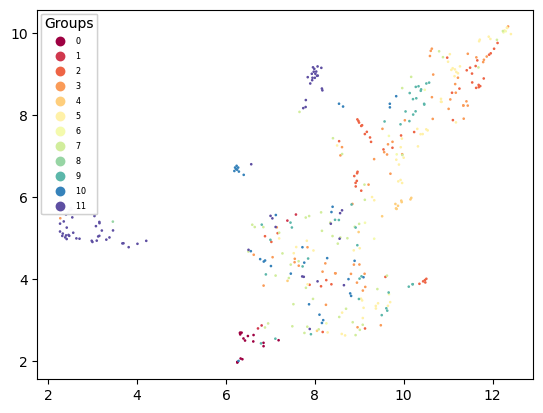

In [61]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import operator
fontP = FontProperties()
fontP.set_size('xx-small')
%matplotlib inline
fig, ax = plt.subplots()
#plt.subplots(111)
# Dimension reduction and clustering libraries
import umap.umap_ as umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

#lowd_mnist = PCA(n_components=50).fit_transform(vss22)
from sklearn.cluster import AgglomerativeClustering
standard_embedding = umap.UMAP(random_state=42,n_components=2).fit_transform(embf)
hdbscan_labels222 = AgglomerativeClustering(n_clusters=5,distance_threshold=None).fit_predict(standard_embedding)
#hdbscan.HDBSCAN(min_samples=1000, min_cluster_size=3).fit_predict(standard_embedding)
#hdbscan.HDBSCAN(min_samples=200, min_cluster_size=5).fit_predict(vss22)
#AgglomerativeClustering(n_clusters=None,distance_threshold=1.50).fit_predict(vss22)
#hdbscan.HDBSCAN(min_samples=500, min_cluster_size=10).fit_predict(vss222)
clustered22 = (hdbscan_labels222 >= 0)
#print(set(hdbscan_labels222),np.array(standard_embedding).shape,np.array(emaf).shape,len(standard_embedding[clustered22, 0]))
#print(hdbscan_labels222[clustered22])
catt=[]
sa=set(hdbscan_labels222)
for bb in sa:
    catt.append(bb)
print(len(catt))
# assign categories
categories = np.array(catt)
# assign colormap
colormap = np.array(cll)
 
plt.scatter(standard_embedding[~clustered22, 0],
            standard_embedding[~clustered22, 1],
            color=(0.2, 0.9, 0.1),
            s=0.8,
            alpha=0.8)

scatter=plt.scatter(standard_embedding[clustered22, 0],
            standard_embedding[clustered22, 1],
            c=cltr,
            s=0.8,
            cmap='Spectral')
legend1 = plt.legend(*scatter.legend_elements(), loc='upper left', prop=fontP, title="Groups")
ax.add_artist(legend1)
num_clusters=len(set(hdbscan_labels222))
clustered_sentences22 = [[] for i in range(num_clusters)]
clustered_sentences22id = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(hdbscan_labels222):
    #try:
    clustered_sentences22[cluster_id].append(map_index[sentence_id])
    clustered_sentences22id[cluster_id].append(sentence_id)
    #except:
        #continue
textclus0={}
textclus0id={}
for i, cluster in enumerate(clustered_sentences22):
    # print("Cluster ", i+1)
    # print(len(cluster))
    # print("\n")
     textclus0[i]=cluster
for i, cluster in enumerate(clustered_sentences22id):
    # print("Cluster ", i+1)
    # print(len(cluster))
    # print("\n")
     textclus0id[i]=cluster
prclkgem0={}
prclkgemdm0={}
prclkgemkn0={}
databf=[]
for tt in textclus0:
    hg={}
    fg3={}
    for cx in fmn:
        cc=0
        knbf=[]
        for bb in textclus0[tt]:
            #try:
                if cx==samegroupkn[bb]:
                        #if cx==family_nm_map[fknmpst[bb]]:
                            gh1=[]
                            gh1.append(tt)
                            gh1.append(kgprt[bb])
                            gh1.append(cx)
                            gh1.append(bb)
                            if bb not in knbf:
                                 knbf.append(bb)
                            databf.append(gh1)
                            cc=cc+1
            #except:
                #continue
        if cc!=0:
            hg[cx]=cc
            fg3[cx]=knbf
    dd1=sorted(hg.items(), key=operator.itemgetter(1),reverse=True)
    hg1={}
    cz=0
    hg2=[]
    for xx in dd1:
            if cz<1:
                hg2.append(xx[0])
                cz=cz+1
            hg1[xx[0]]=int(xx[1])
            
    prclkgem0[tt]=hg1
    prclkgemdm0[tt]=hg2
    prclkgemkn0[tt]=fg3
    
    
        
    
                    
        
for tt in prclkgem0:
    print(tt,prclkgem0[tt],prclkgemdm0[tt])#prclkgem0[tt])
    #print(tt,prclkgem0[tt],prclkgemdm0[tt],prclkgemkn0[tt])
    pass#print("\n\n\n")
    

# For each cluster determining per group kinase emzymes

In [62]:
blclpr={}
for xx in fmn:
    gy=[]
    for jj in prclkgemkn0:
        for vv in prclkgemkn0[jj]:
            if xx==vv:
                for tu in prclkgemkn0[jj][vv]:
                    if tu not in gy:
                        gy.append(tu)
    blclpr[xx]=gy
        

# Group Appears as Dominating 

In [63]:
dmg={}
for hh in fmn:
  cc=0
  for kk in prclkgemdm0:
     if hh==prclkgemdm0[kk][0]:
            cc=cc+1
  if cc>0:
     dmg[hh]=cc
for jj in dmg:
    print(jj,dmg[jj])
fknmpst=kgprt   

CAMK 1
Other 2
TK 2


# Updating using ESM-2: Clustering and Visualization

C:\Users\kma27987\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


5
0 {'CMGC': 22, 'AGC': 17, 'CAMK': 15, 'Other': 12, 'CK1': 8, 'TKL': 7, 'TK': 6, 'Atypical': 5, 'NEK': 5, 'STE': 4, 'eLK': 3} ['CMGC']
1 {'TK': 21, 'TKL': 11, 'AGC': 9, 'CMGC': 9, 'CAMK': 8, 'Other': 6, 'STE': 6, 'Atypical': 4, 'eLK': 1} ['TK']
2 {'CAMK': 17, 'CMGC': 16, 'AGC': 12, 'TK': 10, 'Other': 9, 'STE': 9, 'TKL': 5, 'NEK': 3, 'Atypical': 2, 'CK1': 1, 'RGC': 1} ['CAMK']
3 {'TK': 26, 'STE': 16, 'AGC': 11, 'Other': 11, 'CAMK': 10, 'CMGC': 6, 'TKL': 5, 'Atypical': 3, 'CK1': 1} ['TK']
4 {'Other': 13, 'TK': 10, 'CAMK': 8, 'STE': 7, 'TKL': 7, 'AGC': 6, 'CMGC': 6, 'Atypical': 3, 'CK1': 2, 'NEK': 1} ['Other']


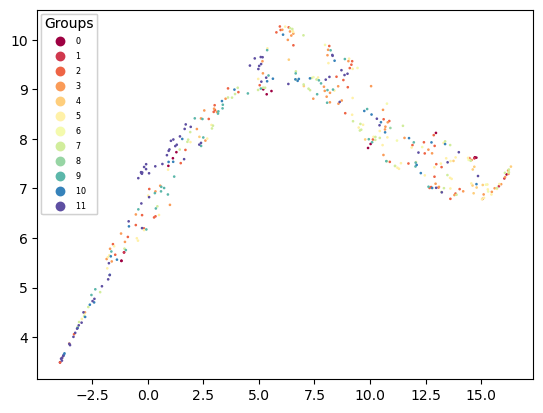

In [64]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
%matplotlib inline
fig, ax = plt.subplots()
#plt.subplots(111)
# Dimension reduction and clustering libraries
import umap.umap_ as umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

#lowd_mnist = PCA(n_components=50).fit_transform(vss22)
from sklearn.cluster import AgglomerativeClustering
standard_embeddingesm = umap.UMAP(random_state=42,n_components=2).fit_transform(emafem)
hdbscan_labels222 = AgglomerativeClustering(n_clusters=5,distance_threshold=None).fit_predict(standard_embeddingesm)
#hdbscan.HDBSCAN(min_samples=1000, min_cluster_size=3).fit_predict(standard_embedding)
#hdbscan.HDBSCAN(min_samples=200, min_cluster_size=5).fit_predict(vss22)
#AgglomerativeClustering(n_clusters=None,distance_threshold=1.50).fit_predict(vss22)
#hdbscan.HDBSCAN(min_samples=500, min_cluster_size=10).fit_predict(vss222)
clusteredesm = (hdbscan_labels222 >= 0)
#print(set(hdbscan_labels222),np.array(standard_embedding).shape,np.array(emaf).shape,len(standard_embedding[clustered22, 0]))
#print(hdbscan_labels222[clustered22])
catt=[]
sa=set(hdbscan_labels222)
for bb in sa:
    catt.append(bb)
print(len(catt))
# assign categories
categories = np.array(catt)
# assign colormap
colormap = np.array(cll)
 
plt.scatter(standard_embeddingesm[~clusteredesm, 0],
            standard_embeddingesm[~clusteredesm, 1],
            color=(0.2, 0.9, 0.1),
            s=0.8,
            alpha=0.8)

scatter=plt.scatter(standard_embeddingesm[clusteredesm, 0],
            standard_embeddingesm[clusteredesm, 1],
            c=cltr,
            s=0.8,
            cmap='Spectral')
legend1 = plt.legend(*scatter.legend_elements(), loc='upper left', prop=fontP, title="Groups")
ax.add_artist(legend1)
num_clusters=len(set(hdbscan_labels222))
clustered_sentences22 = [[] for i in range(num_clusters)]
clustered_sentences22id = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(hdbscan_labels222):
    try:
         clustered_sentences22[cluster_id].append(map_index[sentence_id])
         clustered_sentences22id[cluster_id].append(sentence_id)
    except:
        continue
textclus2={}
textclus2id={}
for i, cluster in enumerate(clustered_sentences22):
    # print("Cluster ", i+1)
    # print(len(cluster))
    # print("\n")
     textclus2[i]=cluster
for i, cluster in enumerate(clustered_sentences22id):
    # print("Cluster ", i+1)
    # print(len(cluster))
    # print("\n")
     textclus2id[i]=cluster
prclkgem2={}
prclkgem2id={}
prclkgemdm2={}
prclkgemkn={}
prcluidd={}
dataesm=[]
for tt in textclus2:
    hg={}
    fg1={}
    fg2={}
    uidd=[]
    for cx in fmn:
        cc=0
        knaf=[]
        knafid=[]
        for bb in textclus2[tt]:
            try:
                if cx==samegroupkn[bb]:
                        #if cx==family_nm_map[fknmpst[bb]]:
                            gh1=[]
                            gh1.append(tt)
                            gh1.append(kgprt[bb])
                            gh1.append(cx)
                            gh1.append(bb)
                            if bb not in knaf:
                                knaf.append(bb)
                            if fknmpst[bb] not in knafid:
                                knafid.append(fknmpst[bb])
                            if fknmpst[bb] not in uidd:
                                uidd.append(fknmpst[bb])
                            dataesm.append(gh1)
                            cc=cc+1
            except:
                continue
        if cc!=0:#prclkgem2id
            hg[cx]=cc
            fg1[cx]=knaf
            fg2[cx]=knafid
    dd1=sorted(hg.items(), key=operator.itemgetter(1),reverse=True)
    hg1={}
    cz=0
    hg2=[]
    for xx in dd1:
            if cz<1:
                hg2.append(xx[0])
                cz=cz+1
            hg1[xx[0]]=int(xx[1])
            
    prclkgem2[tt]=hg1
    prclkgemdm2[tt]=hg2
    prclkgemkn[tt]=fg1
    prclkgem2id[tt]=fg2
    prcluidd[tt]=uidd
    
        
    
                    
# prclkgemkn0       
for tt in prclkgem2:
    #print(tt,prclkgem0[tt],prclkgemdm0[tt])prclkgem0[tt],
    print(tt,prclkgem2[tt],prclkgemdm2[tt])

# For each cluster determining per group kinase emzymes after updating

In [65]:
fknmpgrifd2={}
for te in fmn:
    gft=[]
    for bv in prclkgem2id:
        for bv1 in prclkgem2id[bv]:
            if bv1==te:
                for bv2 in prclkgem2id[bv][bv1]:
                    if bv2 not in gft:
                        gft.append(bv2)
    fknmpgrifd2[te]=gft
                
        

In [66]:
alclpr={}
for xx in fmn:
    gy=[]
    for jj in prclkgemkn:
        for vv in prclkgemkn[jj]:
            if xx==vv:
                for tu in prclkgemkn[jj][vv]:
                    if tu not in gy:
                        gy.append(tu)
    alclpr[xx]=gy
        

# Group Appears as Dominating 

In [67]:
dmg2={}
for hh in fmn:
  cc=0
  for kk in prclkgemdm2:
     if hh==prclkgemdm2[kk][0]:
            cc=cc+1
  if cc>0:
     dmg2[hh]=cc
for jj in dmg2:
    print(jj,dmg2[jj])
#####
samegroup=samegroupu

CAMK 1
CMGC 1
Other 1
TK 2


# Mapping Uniprot Ids to Reactomes Ids

In [44]:
f4=open("/Users/kma27987/Downloads/UniProt2Reactome.txt")
vc=0
idd=[]
reidd=[]
pathw=[]
leafnd=[]
for tt in f4:
    jjk=tt.strip("\n").split("\t")
    #if vc<10:
    #print(jjk[0],jjk[1])
    idd.append(jjk[0])
    bn=jjk[1].split("-")
    reidd.append(bn[2])
    pathw.append(jjk[2])
    leafnd.append(jjk[3])
    #vc=vc+1
#print(len(set(idd)),len(reidd))
spth=set(pathw)
upath=[]
pthlf={}
for vc in spth:
    upath.append(vc)

for t5 in upath:
    ghhh=[]
    for t6 in range(0,len(pathw)):
        if t5==pathw[t6]:
            if leafnd[t6] not in ghhh:
                  ghhh.append(leafnd[t6])
    pthlf[t5]=ghhh
#print(len(pathw),len(leafnd),len(upath),len(pthlf))
#import sys
#sys.exit()
sds=set(idd)
iddu=[]
for hh1 in sds:
    if hh1 not in iddu:
        if hh1 in vlidd:
             iddu.append(hh1)
remp={}
for kk1 in iddu:
    hg1=[]
    for jl in range(0,len(idd)):
        if kk1==idd[jl]:
            hg1.append(reidd[jl])
    remp[kk1]=hg1


rempw={}
for kk1 in iddu:
    hg1=[]
    for jl in range(0,len(idd)):
        if kk1==idd[jl]:
            hg1.append(pathw[jl])
    rempw[kk1]=hg1

rempwfm={}
for tt in rempw:
    #if tt=='P06493':
      for kk in range(0,len(rempw[tt])):
          #print(idfm[tt],rempw[tt][kk],remp[tt][kk])
          rempwfm[rempw[tt][kk]]=idfm[tt]
          #print("\n\n\n")

# Phosphorylation Relation

In [68]:
import pandas as pd
f33=pd.read_csv("/Users/kma27987/Downloads/Kinase_Substrate Data/New folder/Kinase_Substrate_Dataset/Kinase_Substrate_Dataset.txt", delimiter='\t')

k1=[]
k2=[]
pkk=[]
pkk1={}
pkk2={}
h1=[]
h2=[]
gn1=[]
gn2=[]
for jj in f33['KIN_ACC_ID']:
    k1.append(jj)
for jj in f33['SUB_ACC_ID']:
    k2.append(jj)
for jj in f33['KIN_ORGANISM']:
    h1.append(jj)
for jj in f33['SUB_ORGANISM']:
    h2.append(jj)
for jj in f33['SUB_GENE']:
    gn2.append(jj)
for jj in f33['GENE']:
    gn1.append(jj)
for vv in range(0,len(h1)):
   # if h1[vv]=='human' and h2[vv]=='human':
      #if k1[vv]!=k2[vv]:
        gggg=str(k1[vv])+":"+str(k2[vv])
        gggg1=str(gn1[vv])+":"+str(gn2[vv])
        try:
           gggg2=str(family_nm_map[k1[vv]])+":"+str(family_nm_map[k2[vv]])
        except:
            continue
        if gggg not in pkk:
            pkk.append(gggg)
            pkk1[gggg]=gggg1
            if len(gggg2)>0:
                pkk2[gggg]=gggg2
# Per sequence gene id mapping
gn=gn1+gn2
ku=k1+k2
gnid={}
for tt in range(0,len(gn)):#,len(ku))
 #if str(ku[tt]) in gtee:
    gnid[str(ku[tt])]=gn[tt]
print(len(gnid))
for vv in gnid:
    pass#print(vv,gnid[vv])


5604


# Detection of ranked kinase enzyme pairs based on score

In [69]:
bclprr={}
sd2=0
for jk in prclkgemkn0:
    ghh=[]
    gtt1=[]
    for jk1 in prclkgemkn0[jk]:
        #print(jk,jk1,prclkgemkn[jk][jk1])
        for jk2 in prclkgemkn0[jk][jk1]:
            hh=jk1+":"+jk2
            gtt1.append(hh)
    for vc in range(0,len(gtt1)):
        for vc1 in range(vc+1,len(gtt1)):
            hh1=gtt1[vc]+"::"+gtt1[vc1]
            ghh.append(hh1)
    #print(jk,len(gtt1),len(ghh))
    sd2=sd2+len(ghh)
    if len(ghh)>=1:
        bclprr[jk]=ghh  
    #print("\n\n
print(sd2)

18745


In [70]:
aclprr={}
sd=0
for jk in prclkgemkn:
    ghh=[]
    gtt1=[]
    for jk1 in prclkgemkn[jk]:
        #print(jk,jk1,prclkgemkn[jk][jk1])
        for jk2 in prclkgemkn[jk][jk1]:
            hh=jk1+":"+jk2
            gtt1.append(hh)
    if len(gtt1)>1:
      for vc in range(0,len(gtt1)):
        for vc1 in range(vc+1,len(gtt1)):
            hh1=gtt1[vc]+"::"+gtt1[vc1]
            ghh.append(hh1)
    #print(jk,len(gtt1),len(ghh))
    sd=sd+len(ghh)
    if len(ghh)>=1:
       aclprr[jk]=ghh  
    #print("\n\n")
print(sd)

17570


In [71]:
a1=[]
b1=[]
for ty in aclprr:
    for kk2 in aclprr[ty]:
        if kk2 not in a1:
            a1.append(kk2)
for ty in bclprr:
    for kk in bclprr[ty]:
        if kk not in b1:
            b1.append(kk)
fs4=list(set(a1).difference(set(b1)))
print(len(fs4))
#ttp=sigp+sigp1a

######

unprr={}
gprr={}
p22=[]
gr0={}
for tt in fs4:
    hh=tt.split("::")
    h1=hh[0].split(":")
    h2=hh[1].split(":")
   # if kgprt[h1[1]]=='P48736' and kgprt[h2[1]]=='P00533':
    xzz=kgprt[h1[1]]+":"+kgprt[h2[1]]
    g5=h1[0]+":"+h2[0]
    #if g5 in ttp:
    p22.append(xzz)
    gr0[xzz]=g5
    #print(xzz)
    
    

13573


# Determining Phosphorylation Pairs

In [72]:
#len(k22)
from scipy import spatial
import operator
from scipy import stats
import numpy
import statistics
from sklearn.metrics.pairwise import cosine_similarity
f1 = open('/Users/kma27987/OneDrive - University of Georgia/Documents/Tree/chumby-main/chumby-main/Sequence_Pair_Distance_Score_Complex3a89.csv', 'w',newline='')
#writer = csv.writer(f)
header = ['Kinase-1','Kinase-2',"dist1","dist2","tdist"]
bbn=0
knn233=[]
kb=[]
kbb=[]
uniqgg1={}
uniqgg2={}
for ttt in p22:
 # if ttt in check:
    trr=ttt.split(":")
    #sm1=1-spatial.distance.cosine(bfem[trr[0]],bfem[trr[1]])
    #sm2=1-spatial.distance.cosine(kgg[trr[0]],kgg[trr[1]])
    #sm3=1-spatial.distance.cosine(afem[trr[0]],afem[trr[1]])
    sm1=spatial.distance.cosine(bfem[trr[0]],afem[trr[0]][0:len(bfem[trr[0]])])
    sm2=spatial.distance.cosine(bfem[trr[1]],afem[trr[1]][0:len(bfem[trr[0]])])
   # sm3=spatial.distance.cosine(afem[trr[0]],afem[trr[1]])
    #d1=sm3-sm2
    #d2=sm3-sm1
    #d3=sm3-max(sm1,sm2)#max(sm1,sm2)
    #d4=(sm3+sm1+sm2)/3
    sm3=sm1+sm2
    uniqgg1[ttt]=sm3#d3
    uniqgg2[ttt]=sm3#d4
    ggg=trr[0]+":"+trr[1]
    bcx=trr[0]+":"+trr[1]
    #if d1>0 and d2>0:
       #print(ttt,rankedknid[ttt],sm1,sm2,sm3)
    kbb.append(ttt)
    knn1=[]
    knn1.append(trr[0])
    knn1.append(trr[1])
   # knn1.append(check[ttt])
    if trr[0] not in kb:
       kb.append(trr[0])
    if trr[1] not in kb:
       kb.append(trr[1])
    knn1.append(sm1)
    knn1.append(sm2)
    knn1.append(sm3)
    knn233.append(knn1)
    bbn=bbn+1
       
writer = csv.writer(f1)
#header = ['Uniprot ID','Family', 'Kinase','Uniprot ID','Family', 'Kinase']
writer.writerow(header)
writer.writerows(knn233)
f1.close()

dd2=sorted(uniqgg1.items(), key=operator.itemgetter(1),reverse=True)
ccd=500
cc1=0
dd1=[]
pyyy=[]
for vv in dd2:
   # if cc1<ccd:
        dd1.append(vv)
        pyyy.append(vv[0])
        cc1=cc1+1
uni=[]
uni5={}
uni6={}
c=0
gte=[]
sigapp=[]
ccc=-1
for jj in dd1:
# if ccc<300:
  #if jj in check:
    #ccc=ccc+1
    uni.append(jj[0])
    c=c+1
    tt1=jj[0].split(":")
    gtr=tt1[1]+":"+tt1[0]
    #print(jj[0],gtr)
    #if tt in pkk or gtr in pkk:
    if jj[0] in pkk: 
        print(c,jj[0],pkk1[jj[0]],pkk2[jj[0]],jj[1],uniqgg2[jj[0]])
        fttt=[]
        fttt.append(jj[0])
        fttt.append(pkk1[jj[0]])
        #fttt.append(pkk2[jj[0]])
        fttt.append(uniqgg1[jj[0]])
        sigapp.append(fttt)
        vx=jj[0].split(":")
        if vx[0] not in gte:
            gte.append(vx[0])
        if vx[1] not in gte:
            gte.append(vx[1])
        uni5[jj[0]]=jj[1]
        uni6[jj[0]]=jj[1]
    elif gtr in pkk:
        gtrr=gtr.split(":")
        ytt=gtrr[1]+":"+gtrr[0]
        print(c,gtr,pkk1[gtr],pkk2[gtr],jj[1],uniqgg2[ytt])
        fttt=[]
        fttt.append(gtr)
        fttt.append(pkk1[gtr])
       # fttt.append(pkk2[gtr])
        fttt.append(uniqgg1[ytt])
        sigapp.append(fttt)
        vx=gtr.split(":")
        if vx[0] not in gte:
            gte.append(vx[0])
        if vx[1] not in gte:
            gte.append(vx[1])
        uni5[gtr]=jj[1]
        uni6[jj[0]]=jj[1]
    
cvv=1
rankk={}
rank_1={}
for tt in dd1:
   rankk[tt[0]]=cvv
   rank_1[tt[0]]=tt[1]
   cvv=cvv+1
print(len(uni5),len(uni6),len(rank_1),len(dd1),len(p22))

71 Q04759:Q9UHD2 PRKCQ:TBK1 AGC:Other 1.8804457769753147 1.8804457769753147
126 Q9UM73:Q96KB5 ALK:PBK TK:Other 1.878429433998452 1.878429433998452
131 P49841:Q9UHD2 GSK3B:TBK1 CMGC:Other 1.8782833724515997 1.8782833724515997
171 P17252:P36897 PRKCA:TGFBR1 AGC:TKL 1.8770739501085405 1.8770739501085405
332 P17252:Q13418 PRKCA:ILK AGC:TKL 1.873526263208102 1.873526263208102
359 Q02156:P00533 PRKCE:EGFR AGC:TK 1.8731655610969649 1.8731655610969649
364 P08581:Q96KB5 MET:PBK TK:Other 1.8730442898285182 1.8730442898285182
457 Q9UHD2:P31749 TBK1:AKT1 Other:AGC 1.8718139641851457 1.8718139641851457
490 Q02750:P49841 MAP2K1:GSK3B STE:CMGC 1.8713582578619117 1.8713582578619117
491 Q05655:P00533 PRKCD:EGFR AGC:TK 1.871324499661032 1.871324499661032
497 Q9P1W9:Q13131 PIM2:PRKAA1 CAMK:CAMK 1.871270891362951 1.871270891362951
513 P31749:P49841 AKT1:GSK3B AGC:CMGC 1.8710310708773583 1.8710310708773583
521 P27361:P49841 MAPK3:GSK3B CMGC:CMGC 1.8709216414112877 1.8709216414112877
693 P17252:P00533 PRKCA

# Determining co-occurrence of "PIK" and "EGFR" gene pairs

In [73]:
check={}
mjgn=[]
for tt in fs4:
            hh=tt.split("::")
            h1=hh[0].split(":")
            h2=hh[1].split(":")
           # if h1[0]=='Atypical' and h2[0]=='TK':
            xzz=kgprt[h1[1]]+":"+kgprt[h2[1]]
            #if xzz in pyyy:
            g5=h1[0]+":"+h2[0]
            #if g5=='Atypical:TK':
            #print(xzz)
            xzz1=xzz.split(":")
            try:
             if 'PIK3C' in str(gnid[xzz1[0]]) or 'EGFR' in gnid[xzz1[1]] or 'FYN' in gnid[xzz1[1]]:
                 print(xzz,gr0[xzz],family_nm_map[xzz1[0]],family_nm_map[xzz1[1]],gnid[xzz1[0]],gnid[xzz1[1]])
                 vvv7=str(xzz)+"::"+str(gr0[xzz])+"::"+str(gnid[xzz1[0]])+"::"+str(gnid[xzz1[1]])
                 mjgn.append(vvv7)
                 vx=gnid[xzz1[0]]+":"+gnid[xzz1[1]]
                 check[xzz]=vx
                 #print(vx)
             elif 'PIK3C' in str(gnid[xzz1[1]]) or 'EGFR' in gnid[xzz1[0]] or 'FYN' in gnid[xzz1[0]]:
                 print(xzz,gr0[xzz],family_nm_map[xzz1[0]],family_nm_map[xzz1[1]],gnid[xzz1[0]],gnid[xzz1[1]])
                 vvv7=str(xzz)+"::"+str(gr0[xzz])+"::"+str(gnid[xzz1[0]])+"::"+str(gnid[xzz1[1]])
                 #print(vvv7)
                 mjgn.append(vvv7)
                 vx1=gnid[xzz1[1]]+":"+gnid[xzz1[0]]
                 check[xzz]=vx1
            except:
                continue 
        
         
print(len(check))
for tt in check:
    if 'PIK' in check[tt] and 'EGFR' in check[tt]:
    #if 'MTOR' in check[tt] and 'EGFR' in check[tt]:
        print(tt,check[tt],rank_1[tt])
#P48736:P00533 PIK3CG:EGFR
#P42338:P00533 PIK3CB:EGFR
#P42336:P00533 PIK3CA:EGFR
#O00329:P00533 PIK3CD:EGFRbfem3
        
#threm=['rte_hle_dsl_','rte_hle_cml_','rte_dsl_cml_','hle_dsl_cml_']

P48736:P29317 Atypical:TK Atypical TK PIK3CG EPHA2
O00443:O14936 Atypical:CAMK Atypical CAMK PIK3C2A CASK
P10721:P06241 TK:TK TK TK KIT FYN
Q8NEB9:O95382 Atypical:STE Atypical STE PIK3C3 MAP3K6
Q8NEB9:Q8TAS1 Atypical:Other Atypical Other PIK3C3 UHMK1
Q8NEB9:Q8IV63 Atypical:CK1 Atypical CK1 PIK3C3 VRK3
Q8NEB9:P35626 Atypical:AGC Atypical AGC PIK3C3 GRK3
Q8NEB9:P31152 Atypical:CMGC Atypical CMGC PIK3C3 MAPK4
P29323:P06241 TK:TK TK TK EPHB2 FYN
P42336:Q16539 Atypical:CMGC Atypical CMGC PIK3CA MAPK14
P42336:Q13418 Atypical:TKL Atypical TKL PIK3CA ILK
Q02750:P06241 STE:TK STE TK MAP2K1 FYN
P37173:P06241 TKL:TK TKL TK TGFBR2 FYN
O00443:Q8IZL9 Atypical:CMGC Atypical CMGC PIK3C2A CDK20
O00329:P17252 Atypical:AGC Atypical AGC PIK3CD PRKCA
O00443:Q9BYT3 Atypical:CAMK Atypical CAMK PIK3C2A STK33
O00443:Q9Y2H1 Atypical:AGC Atypical AGC PIK3C2A STK38L
Q00535:P00533 CMGC:TK CMGC TK CDK5 EGFR
O00329:P36897 Atypical:TKL Atypical TKL PIK3CD TGFBR1
P00533:P43405 TK:TK TK TK EGFR SYK
P48736:P51817 Atypic

# Knowledge Graph Impact

In [ ]:
gene11=[]
gene12=[]
for tt in check:
    hh=check[tt]
    hh1=hh.split(":")
    if hh1[0] not in gene11:
        gene11.append(hh1[0])
    if hh1[1] not in gene11:
        gene11.append(hh1[1])
print(len(gene11))
for tt in check:
    hh=tt
    hh1=hh.split(":")
    if hh1[0] not in gene12:
        gene12.append(hh1[0])
    if hh1[1] not in gene12:
        gene12.append(hh1[1])
gtt=[]
for tt in check:
    tt1=tt.split(":")
    print(gnid[tt1[0]],gnid[tt1[1]])
    if tt1[0] not in gtt:
        gtt.append(tt1[0])
    if tt1[1] not in gtt:
        gtt.append(tt1[1])
kmkgfm7={}
kmkgfm77={}
for we in  gene12:
 wtt=[]
 for te in fmkgfm3:
    for te1 in fmkgfm3[te]:
        if kgprt[te1[0]]==we:
             #print(te,we)
             wtt.append(te1)
 kmkgfm7[we]=wtt
 kmkgfm77[we]=len(wtt)
ddkg=sorted(kmkgfm77.items(), key=operator.itemgetter(1),reverse=True)  
kmkgfm777={}
for vv in ddkg:
    kmkgfm777[vv[0]]=kmkgfm7[vv[0]]

k222=[]
ch55r={}
ch55t={}
relation={}
relation1={}
for re in check:
 # y1=re.split(":")
 # y2=fknmpst[y1[0]]+":"+fknmpst[y1[1]]
  #if y2 in uniprraf:
    fn1=[]
    fn2=[]
    go1=[]
    go2=[]
    fm1=[]
    fm2=[]
    re1=re.split(":")
    for vv in kmkgfm777: #kmkgfm777
       if vv==re1[0]:# and vv=='P42336':
        for fg in kmkgfm777[vv]:
            #print(vv,kgprt[fg[0]],fg[1])
            fn1.append(fg[1])
            go1.append(fg[2])
            #family_nm_map
            fm1.append(family_nm_map[vv])
       elif vv==re1[1]:#  and vv=='P00533':
        for fg in kmkgfm777[vv]:
            #print(vv,kgprt[fg[0]],fg[1])
            fn2.append(fg[1])
            go2.append(fg[2])
            fm2.append(family_nm_map[vv])
    if len(fn1)>0:
      ch55r[re1[0]]=fn1
    if len(fn2)>0:
      ch55r[re1[1]]=fn2
    if len(go1)>0:
       ch55t[re1[0]]=go1
    if len(go2)>0:
        ch55t[re1[1]]=go2
    fnd=list(set(fn1).intersection(set(fn2)))
    fnd1=list(set(fn1).difference(set(fn2)))
    go3=list(set(go1).intersection(set(go2)))
    go4=list(set(go1).difference(set(go2)))
    relation[re]=fnd[0]
    relation1[re]=go3[0]
    if len(fnd)>=len(fnd1) and len(go3)>=1:
        ###'P42336:P00533', 'P48736:P00533', 'P42338:P00533', and 'O00329:P00533'
        LL=['P42336','P48736','P42338','O00329','P00533']
        if re1[0] in LL and re1[1] in LL:
                 print(re1[0],re1[1],gnid[re1[0]],gnid[re1[1]],family_nm_map[re1[0]],family_nm_map[re1[1]],go3,fnd,len(fnd),len(fnd1),len(fnd)+len(fnd1))
        if re not in k222:
           k222.append(re)
print(len(k222))


            